In [20]:
# Import packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [21]:
# Read Data and convert to local CRS

gdf = gpd.read_file("C:/Users/alkaye/geodemographics-demonstrator/processed_data/h3_preprocessed.geojson").to_crs('2180')

In [22]:
# Drop unique cols

#gdf1 = gdf.drop(columns=['id', 'name', 'geometry', 'Type'])
gdf1 = gdf.drop(columns=['h3_index', 'geometry', 'Type'])
gdf1

,total,total_male,total_female,0-4_total,0-4_males,0-4_females,5-9_total,5-9_males,5-9_females,10-14_total,...,85+_total,85+_males,85+_females,population_density,hospital,nursing_home,pharmacy,place_of_worship,school,university
0,1660.0,812.0,849.0,81.0,42.0,39.0,95.0,45.0,50.0,101.0,...,32.0,8.0,24.0,0.046893,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000028,0.0,0.0,0.0,0.0,0.0,0.0
2,23.0,11.0,12.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.000649,0.0,0.0,0.0,0.0,0.0,0.0
3,27.0,13.0,13.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,1.0,0.0,0.0,0.000762,0.0,0.0,0.0,0.0,0.0,0.0
4,1879.0,932.0,947.0,107.0,55.0,52.0,119.0,63.0,56.0,114.0,...,41.0,11.0,30.0,0.053056,0.0,0.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9723,605.0,305.0,300.0,23.0,13.0,10.0,30.0,15.0,15.0,34.0,...,14.0,3.0,11.0,0.019110,0.0,0.0,0.0,0.0,0.0,0.0
9724,7.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000222,0.0,0.0,0.0,0.0,0.0,0.0
9725,169.0,85.0,84.0,6.0,4.0,3.0,8.0,4.0,4.0,9.0,...,4.0,1.0,3.0,0.005349,0.0,0.0,0.0,0.0,0.0,0.0
9726,572.0,286.0,286.0,23.0,11.0,11.0,30.0,16.0,13.0,30.0,...,14.0,3.0,11.0,0.018102,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Scale data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(gdf1)

# stats of scaled data
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,9.728000e+03,9.728000e+03,9728.000000,9.728000e+03,9.728000e+03,9.728000e+03,9.728000e+03,9.728000e+03,9.728000e+03,9.728000e+03,...,9.728000e+03,9.728000e+03,9.728000e+03,9.728000e+03,9.728000e+03,9.728000e+03,9.728000e+03,9.728000e+03,9.728000e+03,9.728000e+03
mean,1.022574e-17,5.843279e-18,0.000000,-3.652049e-17,1.022574e-17,2.629476e-17,-3.944213e-17,1.314738e-17,-1.899066e-17,8.764919e-18,...,1.752984e-17,-2.629476e-17,2.045148e-17,-2.045148e-17,-2.994681e-17,2.921640e-18,-1.241697e-17,-2.775558e-17,-3.652049e-18,7.304099e-19
std,1.000051e+00,1.000051e+00,1.000051,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,...,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,-4.453520e-01,-4.591685e-01,-0.433059,-4.328888e-01,-4.329924e-01,-4.325682e-01,-4.683436e-01,-4.685066e-01,-4.679690e-01,-4.908859e-01,...,-3.745476e-01,-3.580780e-01,-3.803395e-01,-4.459672e-01,-8.362600e-02,-6.904383e-02,-2.656505e-01,-2.419901e-01,-1.700191e-01,-3.776580e-02
25%,-3.223248e-01,-3.277344e-01,-0.317635,-3.193396e-01,-3.172029e-01,-3.214050e-01,-3.397067e-01,-3.432372e-01,-3.405306e-01,-3.511789e-01,...,-2.808522e-01,-2.814915e-01,-2.797843e-01,-3.200061e-01,-8.362600e-02,-6.904383e-02,-2.656505e-01,-2.419901e-01,-1.700191e-01,-3.776580e-02
50%,-2.474150e-01,-2.493653e-01,-0.245955,-2.419197e-01,-2.416880e-01,-2.420028e-01,-2.570115e-01,-2.582330e-01,-2.555716e-01,-2.626977e-01,...,-2.228503e-01,-2.202224e-01,-2.232220e-01,-2.460155e-01,-8.362600e-02,-6.904383e-02,-2.656505e-01,-2.419901e-01,-1.700191e-01,-3.776580e-02
75%,-1.018256e-01,-9.674201e-02,-0.104761,-8.707988e-02,-8.562390e-02,-8.849173e-02,-8.472992e-02,-8.822447e-02,-8.093380e-02,-8.340703e-02,...,-1.146545e-01,-1.130013e-01,-1.100973e-01,-1.022243e-01,-8.362600e-02,-6.904383e-02,-5.867884e-02,-2.419901e-01,-1.700191e-01,-3.776580e-02
max,1.331711e+01,1.311662e+01,13.498385,1.453238e+01,1.451896e+01,1.454270e+01,1.401480e+01,1.403143e+01,1.399393e+01,1.344256e+01,...,1.506288e+01,1.531152e+01,1.493548e+01,1.343144e+01,3.181887e+01,3.351387e+01,2.622672e+01,3.381704e+01,3.994510e+01,7.606356e+01


In [24]:
# # define the kmeans function with intialisation as kmeans++
# kmeans = KMeans(n_clusters=2, init='k-means++')

# # fit on scaled data
# kmeans.fit(df_scaled)

# # inertia in the fitted data
# # high number means worse fit
# kmeans.inertia_

In [25]:
# # Use elbow method to determine a good number of clusters

# # fitting multiple k-means algorithms and storing the values in an empty list
# SSE = []
# for cluster in range(1,20):
#     kmeans = KMeans(n_clusters=cluster, init='k-means++')
#     kmeans.fit(df_scaled)
#     SSE.append(kmeans.inertia_)

# # converting the results into a dataframe and plotting them
# frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
# plt.figure(figsize=(12,6))
# plt.plot(frame['Cluster'], frame['SSE'], marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')

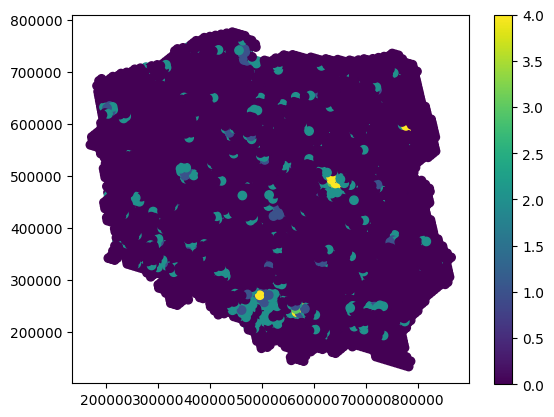

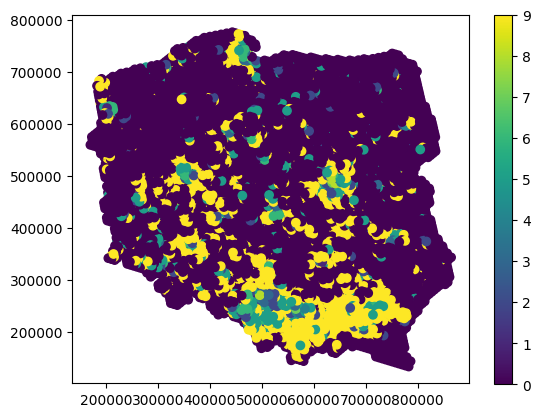

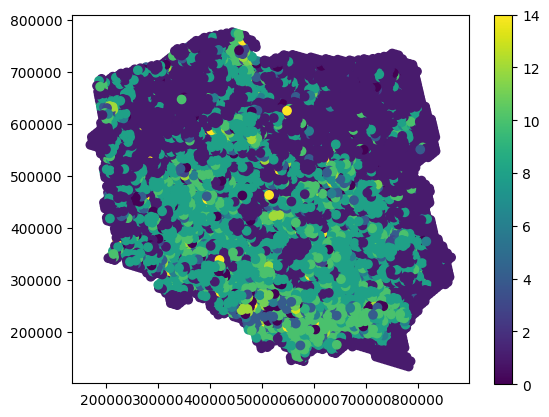

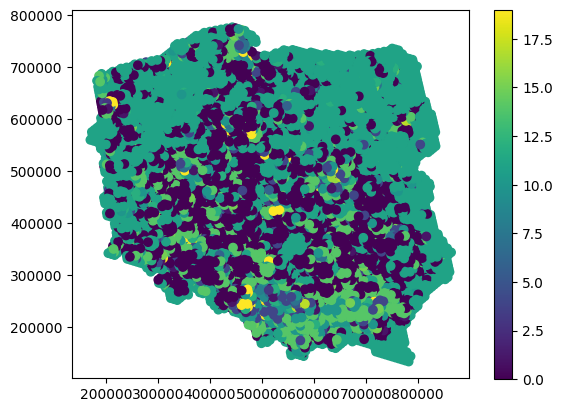

In [26]:
# Set number of cluseter to 5, 10 and 15 and fit the model

k_list = [5, 10, 15, 20]

# Add in Point Geom
gdf_pred = gdf.copy()
gdf_pred['geometry'] = gdf_pred.centroid
gdf_pred = gdf_pred.set_geometry('geometry')

for k in k_list:

    # k means using 5 clusters and k-means++ initialization
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df_scaled)
    pred = kmeans.predict(df_scaled)

    # Combine with orignal gdf
    gdf_pred[f'{k}_clusters'] = pred

    # PLot
    gdf_pred.plot(column=f'{k}_clusters', legend=True)

# # Convert to WGS and save
gdf_pred = gdf_pred.to_crs('4236')
gdf_pred['lon'] = gdf_pred.geometry.x
gdf_pred['lat'] = gdf_pred.geometry.y
gdf_pred.to_file('C:/Users/alkaye/geodemographics-demonstrator/processed_data/h3_clustered.geojson')
gdf_pred.to_csv('C:/Users/alkaye/geodemographics-demonstrator/processed_data/h3_clustered.csv')

    

In [27]:
# predictions = pd.DataFrame(df_scaled)
# predictions['cluster'] = pred
# predictions['cluster'].value_counts()